# FEATURE ENGINEERING

In [66]:
# Import pandas for data manipulation and analysis, which is essential for feature engineering tasks
import pandas as pd

In [67]:
# Load the loan prediction dataset into a pandas DataFrame for analysis and feature engineering
loan_predictions = pd.read_csv('loan_prediction.csv')

In [68]:
# Display the first 5 rows to get an overview of the dataset's structure and sample values
print(loan_predictions.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

In [69]:
# Display the last 5 rows to check for any irregularities or patterns at the end of the dataset
print(loan_predictions.tail())

      Loan_ID Gender Married Dependents     Education Self_Employed  \
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
364             3250               1993       126.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History Property_Area  
362             1.0         Urban  
363             1.0         Urban  
364             NaN     Se

In [70]:
# Show the frequency of unique rows in the dataset, useful for identifying duplicate or common records
print(loan_predictions.value_counts())

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area
LP002989  Male    No       0           Graduate      Yes            9200             0                  98.0        180.0             1.0             Rural            1
LP002879  Male    Yes      0           Graduate      No             3391             1966               133.0       360.0             0.0             Rural            1
LP002878  Male    Yes      3+          Graduate      No             8334             0                  260.0       360.0             1.0             Urban            1
LP002876  Male    No       0           Graduate      No             6858             0                  176.0       360.0             1.0             Rural            1
LP002870  Male    Yes      1           Graduate      No             4700             0                  80.0        360.0             1.0             Urban     

In [71]:
# Generate descriptive statistics for numerical columns to understand data distribution and spot anomalies
# Get summary statistics for numerical columns (mean, std, min, max, etc.)
print(loan_predictions.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [72]:
# Display column data types and non-null counts to identify missing values and data types for feature engineering
print(loan_predictions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [73]:
# Print the shape (rows, columns) of the dataset to understand its size
print(loan_predictions.shape)

(367, 12)


In [74]:
# Print the data types of each column to ensure correct types for feature engineering
print(loan_predictions.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


## Handling missing values

Identify and fill missing values to ensure data quality before feature engineering.

Missing values can negatively impact model performance. In feature engineering, it's important to identify and handle missing data using appropriate strategies such as filling with mean, median, mode, or using domain knowledge.


In [75]:
# Count missing values in each column to determine which features need imputation
print(loan_predictions.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [76]:
# Fill missing values in 'Gender' with the most frequent value (mode) to maintain consistency
loan_predictions['Gender']=loan_predictions['Gender'].fillna(loan_predictions['Gender'].mode())

In [77]:
# Check the distribution of 'Gender' after filling missing values
# The value_counts() function is used here to count the occurrence of each category in the 'Gender' column,
# helping us to understand the distribution of gender in the dataset after imputation of missing values.
print(loan_predictions['Gender'].value_counts())

Gender
Male      286
Female     70
Name: count, dtype: int64


In [78]:
# Fill missing values in 'Dependents' with the mode and check the updated distribution
loan_predictions['Dependents']=loan_predictions['Dependents'].fillna(loan_predictions['Dependents'].mode()[0])
print(loan_predictions['Dependents'].value_counts())

Dependents
0     210
2      59
1      58
3+     40
Name: count, dtype: int64


In [79]:
# Fill missing values in 'Self_Employed' with the mode and check the updated distribution
loan_predictions['Self_Employed']=loan_predictions['Self_Employed'].fillna(loan_predictions['Self_Employed'].mode())
print(loan_predictions['Self_Employed'].value_counts())

Self_Employed
No     307
Yes     37
Name: count, dtype: int64


In [80]:
# Fill missing values in 'LoanAmount' with the median to reduce the effect of outliers
loan_predictions['LoanAmount']=loan_predictions['LoanAmount'].fillna(loan_predictions['LoanAmount'].median())
print(loan_predictions['LoanAmount'].value_counts())

LoanAmount
125.0    16
150.0    12
110.0    10
100.0     9
120.0     9
         ..
197.0     1
85.0      1
60.0      1
76.0      1
98.0      1
Name: count, Length: 144, dtype: int64


In [81]:
# Fill missing values in 'Loan_Amount_Term' with the median value
loan_predictions['Loan_Amount_Term']=loan_predictions['Loan_Amount_Term'].fillna(loan_predictions['Loan_Amount_Term'].median())
print(loan_predictions['Loan_Amount_Term'].value_counts())

Loan_Amount_Term
360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64


In [82]:
# Fill missing values in 'Credit_History' with the mode (most common value)
loan_predictions['Credit_History']=loan_predictions['Credit_History'].fillna(loan_predictions['Credit_History'].mode())
print(loan_predictions['Credit_History'].value_counts())

Credit_History
1.0    279
0.0     59
Name: count, dtype: int64


## Feature Extraction

Feature extraction is the process of transforming raw data into a set of features that can be effectively used for modeling. This includes encoding categorical variables, scaling numerical features, and engineering new features that better represent the underlying problem.

## Encode Categorical Data

Convert categorical variables into numerical format for machine learning models.

Machine learning models require numerical input. Categorical variables must be encoded into numbers using techniques like label encoding or one-hot encoding as part of feature engineering.

In [83]:
# Replace '3+' with 3 and convert 'Dependents' to integer for numerical analysis
loan_predictions['Dependents'] = loan_predictions['Dependents'].replace('3+', 3).astype(int)
loan_predictions['Dependents'] = loan_predictions['Dependents'].astype(int)


In [84]:
# Check the distribution of 'Gender' before encoding to numerical values
loan_predictions['Gender'].value_counts()

Gender
Male      286
Female     70
Name: count, dtype: int64

In [85]:
# Encode 'Gender': Female as 0, Male as 1 for model compatibility
loan_predictions['Gender'] = loan_predictions['Gender'].map({'Female':0,'Male':1})

In [86]:
# Check the distribution of 'Gender' after encoding
# The value_counts() function is used to count the number of occurrences of each unique value in the 'Gender' column
# This helps us understand the distribution of different genders in the dataset after encoding
loan_predictions['Gender'].value_counts()

Gender
1.0    286
0.0     70
Name: count, dtype: int64

In [87]:
# Encode 'Married': No as 0, Yes as 1, and check the distribution
# This mapping allows the machine learning model to interpret the 'Married' feature numerically.
loan_predictions['Married']=loan_predictions['Married'].map({'No':0,'Yes':1})
print(loan_predictions['Married'].value_counts())

Married
1    233
0    134
Name: count, dtype: int64


In [88]:
loan_predictions

# Display the DataFrame to verify the changes after encoding categorical variables
loan_predictions

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1.0,1,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1.0,1,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1.0,1,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1.0,1,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,1.0,0,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1.0,1,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,1.0,1,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,1.0,0,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,1.0,1,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [89]:
# Encode 'Self_Employed': No as 0, Yes as 1, and check the distribution
# This mapping allows us to convert the categorical variable 'Self_Employed'
# into a numerical format that can be used for analysis or modeling.
loan_predictions['Self_Employed']=loan_predictions['Self_Employed'].map({'No':0,'Yes':1})
print(loan_predictions['Self_Employed'].value_counts())

Self_Employed
0.0    307
1.0     37
Name: count, dtype: int64


In [90]:
# Encode 'Education': Not Graduate as 0, Graduate as 1, and check the distribution
# This mapping allows the machine learning model to interpret the education level as numerical values.
# A value of 0 represents 'Not Graduate' and 1 represents 'Graduate'.
loan_predictions['Education']=loan_predictions['Education'].map({'Not Graduate':0,'Graduate':1})
print(loan_predictions['Education'].value_counts())

Education
1    283
0     84
Name: count, dtype: int64


In [91]:
# Rename 'Education' column to 'Graduated' for clarity
# The 'Education' column is renamed to 'Graduated' to better reflect the information it contains
loan_predictions = loan_predictions.rename(columns={'Education': 'Graduated'})

In [92]:
# Check the distribution of the 'Graduated' column
# The value_counts() function is used here to count the unique values in the 'Graduated' column
# and provide a breakdown of how many times each value appears, helping us understand the distribution
# of the target variable in the dataset.
print(loan_predictions['Graduated'].value_counts())

Graduated
1    283
0     84
Name: count, dtype: int64


In [93]:
# Apply one-hot encoding to 'Property_Area' to create binary columns for each category
# One-hot encode 'Property_Area' and add prefix 'Is_' to new columns
loan_predictions=pd.get_dummies(loan_predictions, columns=['Property_Area'],prefix='Is_',dtype=int)
print(loan_predictions)

      Loan_ID  Gender  Married  Dependents  Graduated  Self_Employed  \
0    LP001015     1.0        1           0          1            0.0   
1    LP001022     1.0        1           1          1            0.0   
2    LP001031     1.0        1           2          1            0.0   
3    LP001035     1.0        1           2          1            0.0   
4    LP001051     1.0        0           0          0            0.0   
..        ...     ...      ...         ...        ...            ...   
362  LP002971     1.0        1           3          0            1.0   
363  LP002975     1.0        1           0          1            0.0   
364  LP002980     1.0        0           0          1            0.0   
365  LP002986     1.0        1           0          1            0.0   
366  LP002989     1.0        0           0          1            1.0   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0           

## Feature Generation

Feature generation involves creating new features from existing data to provide additional information to machine learning models. By combining or transforming existing variables, we can help models capture more complex patterns and relationships, potentially improving predictive performance.

In [94]:
# Create a new feature 'TotalIncome' by summing 'ApplicantIncome' and 'CoapplicantIncome'
loan_predictions['TotalIncome'] = loan_predictions['ApplicantIncome'] + loan_predictions['CoapplicantIncome']


In [95]:
# Create a new feature 'FamilySize' by adding 'Dependents', 'Married', and 1 (for the applicant)
loan_predictions['FamilySize'] = loan_predictions['Dependents'] + loan_predictions['Married'] + 1
print(loan_predictions['FamilySize'].value_counts())

FamilySize
2    113
1    110
4     58
3     51
5     35
Name: count, dtype: int64


In [96]:
# Create a new feature 'Income_Loan_Ratio' to measure the ratio of total income to loan amount
loan_predictions['Income_Loan_Ratio'] = loan_predictions['TotalIncome'] / loan_predictions['LoanAmount']
print(loan_predictions[['TotalIncome', 'LoanAmount', 'Income_Loan_Ratio']])

     TotalIncome  LoanAmount  Income_Loan_Ratio
0           5720       110.0          52.000000
1           4576       126.0          36.317460
2           6800       208.0          32.692308
3           4886       100.0          48.860000
4           3276        78.0          42.000000
..           ...         ...                ...
362         5786       113.0          51.203540
363         4867       115.0          42.321739
364         5243       126.0          41.611111
365         7393       158.0          46.791139
366         9200        98.0          93.877551

[367 rows x 3 columns]


In [97]:
# Apply StandardScaler to standardize features (mean=0, std=1) for algorithms sensitive to feature scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
loan_predictions[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome', 'Income_Loan_Ratio']] = scaler.fit_transform(
    loan_predictions[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'TotalIncome', 'Income_Loan_Ratio']]
)

In [98]:
# Display the standardized features to verify the effect of Standard scaling
print(loan_predictions[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Income_Loan_Ratio']])

     ApplicantIncome  CoapplicantIncome  LoanAmount  TotalIncome  \
0           0.186461          -0.673335   -0.426780    -0.126182   
1          -0.352692          -0.029848   -0.163953    -0.346506   
2           0.039641           0.098849    1.183033     0.081817   
3          -0.502774           0.418877   -0.591047    -0.286803   
4          -0.311909          -0.673335   -0.952433    -0.596875   
..               ...                ...         ...          ...   
362        -0.162439           0.088982   -0.377500    -0.113471   
363        -0.132056          -0.369180   -0.344647    -0.290462   
364        -0.317211           0.181644   -0.163953    -0.218048   
365         0.039641           0.353241    0.361700     0.196024   
366         0.896087          -0.673335   -0.623900     0.544037   

     Income_Loan_Ratio  
0             0.064676  
1            -0.365347  
2            -0.464751  
3            -0.021425  
4            -0.209529  
..                 ...  
362     

## Correlation Analysis

Correlation analysis helps identify relationships between numerical features. By examining the correlation matrix, we can detect multicollinearity, redundant features, and gain insights into which variables are most strongly related. This information is useful for feature selection and improving model interpretability.

In [99]:
# Import seaborn and matplotlib for data visualization and correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# Select only numeric columns for correlation analysis and PCA
numeric_df = loan_predictions.select_dtypes(include=['int64', 'float64'])



In [101]:
# Calculate and display the correlation matrix to understand relationships between numeric features
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                     Gender   Married  Dependents  Graduated  Self_Employed  \
Gender             1.000000  0.284138    0.094203  -0.029299       0.074300   
Married            0.284138  1.000000    0.362190  -0.049443       0.032273   
Dependents         0.094203  0.362190    1.000000  -0.129572      -0.017065   
Graduated         -0.029299 -0.049443   -0.129572   1.000000       0.008729   
Self_Employed      0.074300  0.032273   -0.017065   0.008729       1.000000   
ApplicantIncome    0.063773  0.051265    0.138004   0.136369       0.077388   
CoapplicantIncome  0.084235  0.032548   -0.050024   0.057318      -0.026853   
LoanAmount         0.077918  0.179185    0.134761   0.155166       0.084363   
Loan_Amount_Term  -0.061847  0.040692   -0.053460  -0.064173      -0.031467   
Credit_History     0.037465  0.049732   -0.058287   0.040703       0.097753   
Is__Rural          0.049749  0.006513   -0.036394  -0.008388       0.141795   
Is__Semiurban     -0.078943 -0.032205   -0.008587  -

## Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a large set of variables into a smaller one that still contains most of the information. PCA helps reduce noise, avoid overfitting, and visualize high-dimensional data in two or three dimensions for better understanding.

In [102]:
# Prepare numeric data for PCA by dropping rows with NaN values
numeric_df = loan_predictions.select_dtypes(include=['int64', 'float64'])

# Drop rows with any NaN values to avoid errors in PCA
numeric_df = numeric_df.dropna()

from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality and keep the top 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(numeric_df)

# Print the explained variance ratio to see how much variance is captured by each component
print(pca.explained_variance_ratio_)

[9.98031778e-01 7.01011721e-04]


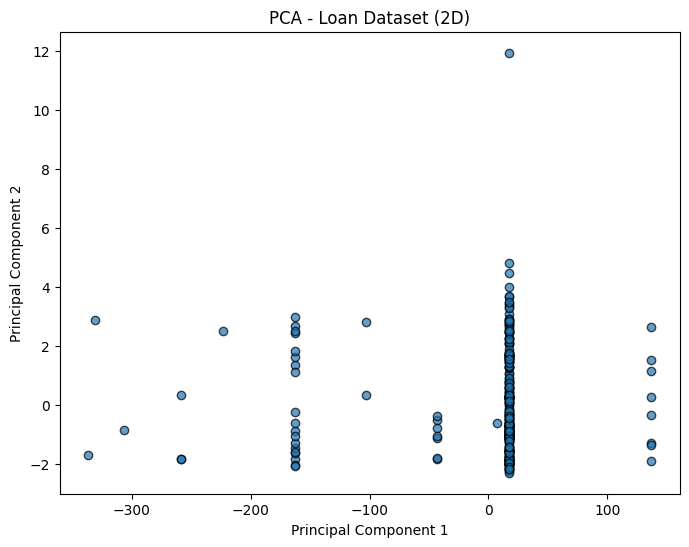

In [103]:
# Visualize the data in the space of the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Loan Dataset (2D)')
plt.show()